In [123]:
# Import libraries required to do operations like convolution, gaussian blur, sobel operator, pixel manipulation, etc.

import matplotlib.image as mpimg 
from scipy import misc
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

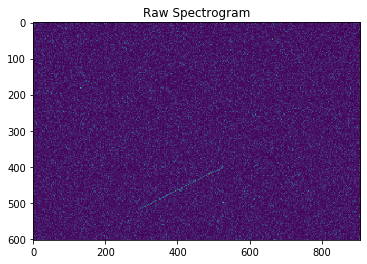

In [124]:
spec = mpimg.imread(r"\Users\Kaustav Dutta\Desktop\spectrogram.png");
plt.imshow(spec),plt.title('Raw Spectrogram')
plt.show()

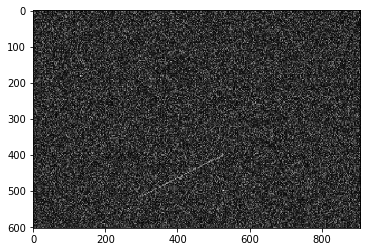

In [125]:
# Convert color image to grayscale to help extraction of edges

spec = np.dot(spec, [1,1,1])
plt.imshow(spec,cmap = plt.get_cmap('gray'));

In [126]:
#Define a threhold. If the pixel is above threshold, mark it as 1, otherwise 0.
T=1

In [128]:
for i in range(1, spec.shape[0]-1):
    for j in range(1, spec.shape[1]-1):
        if (spec[i,j])< T:
            spec[i,j]=0
        else:
            spec[i,j]=1

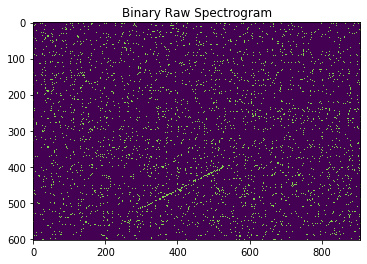

In [129]:
plt.imshow(spec),plt.title('Binary Raw Spectrogram')
plt.show()

In [153]:
spec.shape

(603, 907)

In [199]:
concat_x=[None]*100000
concat_y=[None]*100000

Now we shall proceed with taking the pixels one by one and trying to create a line pixel.

24
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
24
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
24
16331239353195377


IndexError: index 16331239353195377 is out of bounds for axis 1 with size 907

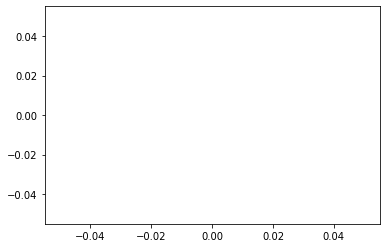

In [203]:
for i in range(5, spec.shape[0]-6):
    for j in range(5, spec.shape[1]-6): 
        m=0
        sum_max1=0
        sum_max2=0
        m_max1=0
        m_max2=0
        sum=0 
        index=0
        s=0
        for m in range (0,180):
            sum=0
            deg=(math.pi*m)/180
            
            if (deg>=0 and deg<=0.785398):
                for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                    if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                        sum=sum+spec[i+k,j+math.floor(k*math.tan(deg))]
                        +spec[i+k,j+math.ceil(k*math.tan(deg))] #Summation of pixel intensities
                    else: 
                        sum=sum+spec[i+k,j+math.floor(k*math.tan(deg))]
                                             
            if (deg>0.785398 and deg<=1.5708):   #Here, replace i and j
                deg=deg-0.785398               
                for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                    if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                        sum=sum+spec[j+k,i+math.floor(k*math.tan(deg))]+spec[j+k,i+math.ceil(k*math.tan(deg))] #Summation of pixel intensities
                    else: 
                        sum=sum+spec[j+k,i+math.floor(k*math.tan(deg))]
                    
                
            if (deg>1.5708 and deg<=2.35619):  #Here, i replaced by -i, j remains same
                deg=deg-1.5708
                for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                    if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                        sum=sum+spec[i+k,j+math.floor(k*math.tan(deg))]+spec[i+k,j+math.ceil(k*math.tan(deg))] #Summation of pixel intensities
                                    
                    else: 
                        sum=sum+spec[i+k,j+math.floor(k*math.tan(deg))]     
                
                
            if (deg>2.35619 and deg<=3.14159):  #Here, i replaced by -j, j replaced by -i
                deg=deg-2.35619
                for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                    if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                        sum=sum+spec[j+k,i+math.floor(k*math.tan(deg))]+spec[j+k,i+math.ceil(k*math.tan(deg))] #Summation of pixel intensities
                    else: 
                        sum=sum+spec[j+k,i+math.floor(k*math.tan(deg))]                            
                                             
            if sum>sum_max1:
                sum_max1=sum
                m_max1=m
                for k in range(0,8):
                    s=s+1
                    
        
        i_next=i+1
        j_next=j+math.floor(math.tan((math.pi*(m_max1))/180))
        index=index+9
        points=1
        print(s)
        
        while points==1:
        
        
              for m in range (0,180):
                    sum=0
                    deg=(math.pi*m)/180
                    
                    if (deg>=0 and deg<=0.785398): 
                        for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                            if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                                sum=sum+spec[i_next+k,j_next+math.floor(k*math.tan(deg))]+spec[i_next+k,j_next+math.ceil(k*math.tan(deg))]#Summation of pixel intensities
                            else: 
                                print(j_next+math.floor(k*math.tan(deg)))
                                sum=sum+spec[i_next+k,j_next+math.floor(k*math.tan(deg))]
                            
                            
                    if (deg>0.785398 and deg<=1.5708):   #Here, replace i and j
                        deg=deg-0.785398                
                        for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                            if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                                sum=sum+spec[j_next+k,i_next+math.floor(k*math.tan(deg))]+spec[j_next+k,i_next+math.ceil(k*math.tan(deg))] #Summation of pixel intensities
                            else: 
                                sum=sum+spec[j_next+k,i_next+math.floor(k*math.tan(deg))]
                                 
                             
                    if (deg>1.5708 and deg<=2.35619):  
                        deg=deg-1.5708
                        for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                            if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                                sum=sum+spec[i_next+k,j_next+math.floor(k*math.tan(deg))]+spec[i_next+k,j_next+math.ceil(k*math.tan(deg))] #Summation of pixel intensities
                            else: 
                                sum=sum+spec[i_next+k,j_next+math.floor(k*math.tan(deg))]      
                            
                        
                    if (deg>2.35619 and deg<=3.14159): 
                        deg=deg-2.35619
                        for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                            if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                                sum=sum+spec[j_next+k,i_next+math.floor(k*math.tan(deg))]+spec[j_next+k,i_next+math.ceil(k*math.tan(deg))] #Summation of pixel intensities
                            else: 
                                sum=sum+spec[j_next+k,i_next+math.floor(k*math.tan(deg))]      
                            
                            
                    if sum>sum_max2:
                        sum_max2=sum
                        m_max2=m
                        if m_max1==m_max2:
                            for k in range(index,index+8):
                                concat_x[k]=i_next+k-4
                                concat_y[k]=j+math.floor((k-4)*math.tan((math.pi*(m_max1))/180))
                            index=index+8
                            print (index)
                            i_next=i_next+1
                            j_next=j_next+math.tan((math.pi*(m_max1))/180)
                        else:
                            points=0

        plt.plot(concat_x, concat_y)
        concat_x=0
        concat_y=0
    

In [130]:
cv2.imshow('Final image',spec)
k=cv2.waitKey(0)
cv2.destroyAllWindows()